In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=21909e909b1a89351e48925f6f16dc653a9b6b3f70da07fc3096a900ca87dcdf
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as img
from IPython.display import Image, display

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b21bc87b26823e7eb92e74f809a1d9acef0e1511e6b8204201d6703835bc0727
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_image

In [ ]:
from skimage.segmentation import mark_boundaries
np.random.seed(123)

In [ ]:
path = '/content/IMG_1800.JPG'

In [ ]:
#path = '/content/Gun.jpeg'

(2304, 3456, 3)


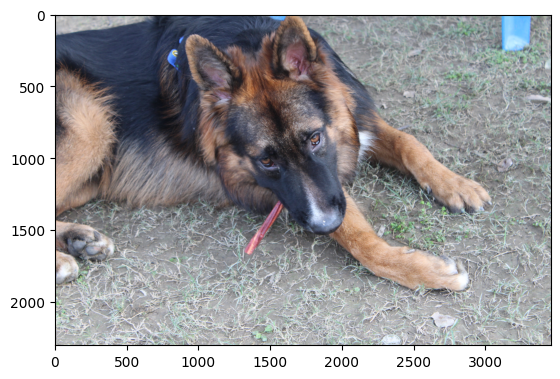

In [ ]:
img = image.load_img(path)
img_arr = image.img_to_array(img)
print(img_arr.shape)
plt.imshow(img)
plt.show()

In [ ]:
img = image.load_img(path, target_size=(299, 299))

(299, 299, 3)


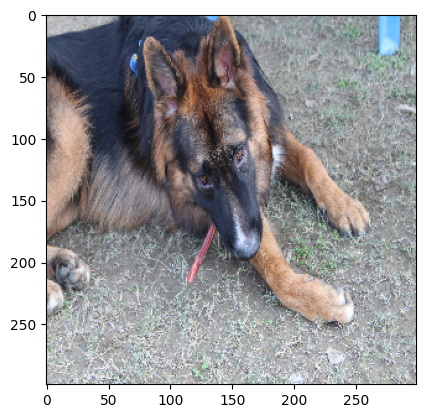

In [ ]:
img_arr = image.img_to_array(img)
print(img_arr.shape)
plt.imshow(img)
plt.show()

In [ ]:
img_arr = np.expand_dims(img_arr, axis=0)
print(img_arr.shape)

(1, 299, 299, 3)


In [ ]:
norm_img = img_arr/255.0
#norm_img = np.expand_dims(norm_img, axis=0)
print(norm_img.shape)

(1, 299, 299, 3)


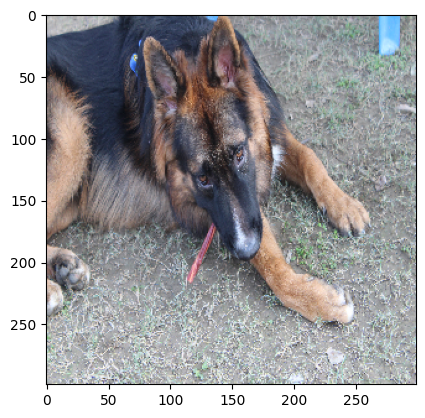

In [ ]:
norm_img = norm_img[0]
plt.imshow(norm_img)
plt.show()

In [ ]:
model = Xception(weights='imagenet')
norm_img = np.expand_dims(norm_img, axis=0)
model_pred = model.predict(norm_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
pred_orig = decode_predictions(model_pred, top=1)[0][0]

In [ ]:
print("The image is :", pred_orig[1])

The image is : German_shepherd


In [ ]:
top5_pred = decode_predictions(model_pred, top=5)[0]

In [ ]:
top5_pred

[('n02106662', 'German_shepherd', 0.8961919),
 ('n02115913', 'dhole', 0.011223234),
 ('n02114367', 'timber_wolf', 0.005780119),
 ('n02105162', 'malinois', 0.0055653146),
 ('n02091467', 'Norwegian_elkhound', 0.004172038)]

In [ ]:
explainer = lime.lime_image.LimeImageExplainer()

In [ ]:
result = explainer.explain_instance(norm_img[0],
                                    model.predict,
                                    top_labels=5,
                                    num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 

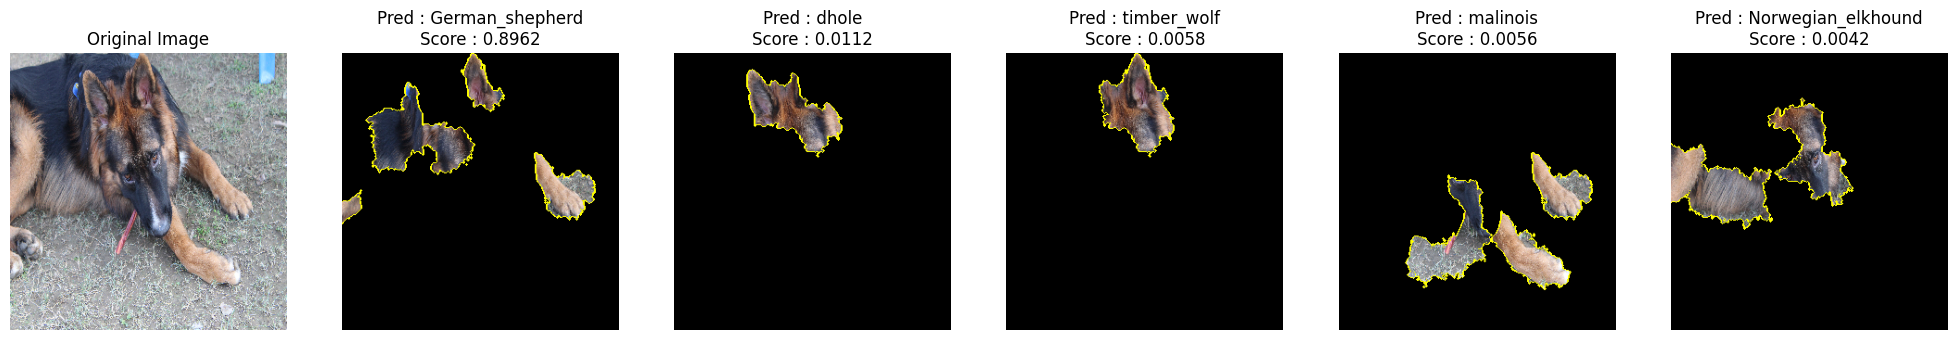

In [ ]:
f, ax = plt.subplots(1,6, figsize=(25,8))
ax[0].imshow(norm_img[0])
ax[0].axis("off")
ax[0].set_title("Original Image")

for axes in range(1,6):
  image, mask = result.get_image_and_mask(result.top_labels[axes-1],
                                          positive_only=True,
                                          num_features=5,
                                          hide_rest=True,
                                          min_weight = 0.001)
  ax[axes].imshow(mark_boundaries(image, mask))
  ax[axes].axis("off")

  label = top5_pred[axes-1]
  ax[axes].set_title("Pred : {}\nScore : {:.4f}".format(label[1], label[2]))
plt.show()